# Small Nimmt 6 tournament

In [39]:
import numpy as np
import logging
import sys
from tqdm import tqdm
from matplotlib import pyplot as plt

sys.path.append("../")

from rl_6_nimmt import Tournament, GameSession
from rl_6_nimmt.agents import Human, DrunkHamster, MaskedReinforceAgent, BatchedReinforceAgent

logging.basicConfig(format="%(message)s",level=logging.INFO)
for name in logging.root.manager.loggerDict:
    if not "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.WARNING)


## Agents

In [2]:
num_copies = 3
agents = {}

for i in range(num_copies):
    agents[f"Batched REINFORCE {i+1}"] = BatchedReinforceAgent()
    agents[f"Batched REINFORCE {i+1}"].train()
    
for i in range(num_copies):
    agents[f"Masked REINFORCE {i+1}"] = MaskedReinforceAgent()
    agents[f"Masked REINFORCE {i+1}"].train()
    
for i in range(num_copies):
    agents[f"Random {i+1}"] = DrunkHamster()
    
baseline_agents = [DrunkHamster(), DrunkHamster()]

merle = Human("Merle")


In [3]:
tournament = Tournament(min_players=3, max_players=3, baseline_agents=baseline_agents)

for name, agent in agents.items():
    tournament.add_player(name, agent)

print(tournament)

Tournament after 0 games:
--------------------------------------------------------------------------------------------------
 Agent                | Games | Tournament score | Tournament pos | Baseline score | Baseline pos 
--------------------------------------------------------------------------------------------------
  Batched REINFORCE 1 |     0 |                - |              - |              - |            - 
  Batched REINFORCE 2 |     0 |                - |              - |              - |            - 
  Batched REINFORCE 3 |     0 |                - |              - |              - |            - 
   Masked REINFORCE 1 |     0 |                - |              - |              - |            - 
   Masked REINFORCE 2 |     0 |                - |              - |              - |            - 
   Masked REINFORCE 3 |     0 |                - |              - |              - |            - 
             Random 1 |     0 |                - |              - |              - 

## Let the games begin

In [13]:
num_games = 100000
for _ in tqdm(range(num_games)):
    tournament.play_game()


100%|██████████| 89993/89993 [35:11<00:00, 42.63it/s]  


## Let's see the results

In [14]:
print(tournament)

Tournament after 100000 games:
--------------------------------------------------------------------------------------------------
 Agent                | Games | Tournament score | Tournament pos | Baseline score | Baseline pos 
--------------------------------------------------------------------------------------------------
  Batched REINFORCE 1 | 33411 |            -9.67 |           0.55 |          -9.85 |         0.88 
  Batched REINFORCE 2 | 33222 |            -9.44 |           0.55 |          -9.58 |         0.94 
  Batched REINFORCE 3 | 33358 |            -9.39 |           0.55 |          -9.54 |         1.00 
   Masked REINFORCE 1 | 33236 |           -10.30 |           0.53 |         -10.53 |         0.82 
   Masked REINFORCE 2 | 33407 |           -10.48 |           0.52 |         -10.58 |         0.80 
   Masked REINFORCE 3 | 33347 |           -10.56 |           0.52 |         -10.41 |         0.95 
             Random 1 | 33341 |           -11.52 |           0.48 |         -1

In [32]:
def color(name):
    if "Batched REINFORCE" in name:
        return "C0"
    elif "Masked REINFORCE" in name:
        return "C1"
    elif "Random" in name:
        return "0.6"
    
    
def label(name):
    return name[:-2] if "1" in name else None


def plot_running_mean(x, y, n=10, **kwargs):
    cumsum = np.cumsum(np.insert(y, 0, 0))
    running_mean_y = (cumsum[n:] - cumsum[:-n]) / n
    
    cumsum = np.cumsum(np.insert(x, 0, 0))
    running_mean_x = (cumsum[n:] - cumsum[:-n]) / n
    
    plt.plot(running_mean_x, running_mean_y, **kwargs)


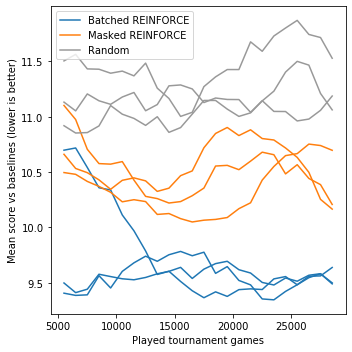

In [33]:
fig = plt.figure(figsize=(5,5))

for name in tournament.agents.keys():
    baseline_scores = np.array(tournament.baseline_scores[name])
    xvals = 1000 * np.arange(1, len(baseline_scores) + 1)
    plot_running_mean(xvals, - baseline_scores, label=label(name), color=color(name))
    
plt.legend()
    
plt.xlabel("Played tournament games")
plt.ylabel("Mean score vs baselines (lower is better)")

plt.tight_layout()
plt.show()


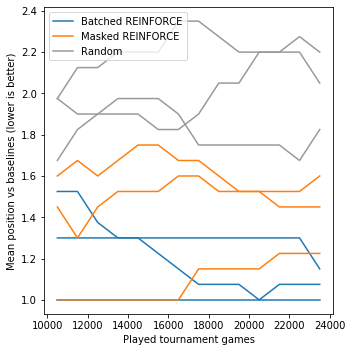

In [35]:
fig = plt.figure(figsize=(5,5))

for name in tournament.agents.keys():
    baseline_pos = np.array(tournament.baseline_positions[name])
    xvals = 1000 * np.arange(1, len(baseline_scores) + 1)
    plot_running_mean(xvals, 4 - 3*baseline_pos, n=20, label=label(name), color=color(name))
    
plt.legend()
    
plt.xlabel("Played tournament games")
plt.ylabel("Mean position vs baselines (lower is better)")

plt.tight_layout()
plt.show()


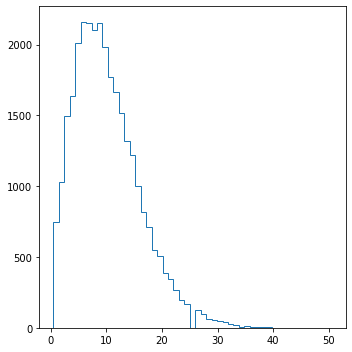

In [45]:
scores = np.array(tournament.tournament_scores["Batched REINFORCE 3"])

plt.figure(figsize=(5,5))

plt.hist(-scores, histtype="step", range=(0.5, 50.5), bins=51)

plt.tight_layout()
plt.show()

## Winner vs humans

In [46]:
winner = agents["Batched REINFORCE 3"]
johann = Human("Johann")
merle = Human("Merle")


In [47]:
session = GameSession(johann, merle, winner)

# The DEBUG output shows the moves, baseline_positionse
for name in logging.root.manager.loggerDict:
    if "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.DEBUG)
        

In [48]:
session.play_game(render=True)

Dealing cards
--------------------------------------------------------------------------------
Board:
   15   _   _   _   _   *
   21   _   _   _   _   *
   43   _   _   _   _   *
   92   _   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  25  30  46  60  61  66  72  74  75 100
  Merle               (player 2):   0 Hornochsen, cards   8  24  38  40  45  64  70  81  82 103
  Batched REINFORCE 3 (player 3):   0 Hornochsen, cards   9  18  20  23  26  27  33  56  62  86
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  25  30  46  60  61  66  72  74  75 100. Choose one to play! 60
It is your turn, Merle! You have the following cards:   8  24  38  40  45  64  70  81  82 103. Choose one to play! 45


Merle               (player 2) plays card 45
Johann              (player 1) plays card 60
Batched REINFORCE 3 (player 3) plays card 86
--------------------------------------------------------------------------------
Board:
   15   _   _   _   _   *
   21   _   _   _   _   *
   43  45  60  86   _   *
   92   _   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  25  30  46  61  66  72  74  75 100
  Merle               (player 2):   0 Hornochsen, cards   8  24  38  40  64  70  81  82 103
  Batched REINFORCE 3 (player 3):   0 Hornochsen, cards   9  18  20  23  26  27  33  56  62
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  25  30  46  61  66  72  74  75 100. Choose one to play! 46
It is your turn, Merle! You have the following cards:   8  24  38  40  64  70  81  82 103. Choose one to play! 81


Johann              (player 1) plays card 46
Batched REINFORCE 3 (player 3) plays card 62
Merle               (player 2) plays card 81
--------------------------------------------------------------------------------
Board:
   15   _   _   _   _   *
   21  46  62  81   _   *
   43  45  60  86   _   *
   92   _   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  25  30  61  66  72  74  75 100
  Merle               (player 2):   0 Hornochsen, cards   8  24  38  40  64  70  82 103
  Batched REINFORCE 3 (player 3):   0 Hornochsen, cards   9  18  20  23  26  27  33  56
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  25  30  61  66  72  74  75 100. Choose one to play! 25
It is your turn, Merle! You have the following cards:   8  24  38  40  64  70  82 103. Choose one to play! 82


Johann              (player 1) plays card 25
Batched REINFORCE 3 (player 3) plays card 56
Merle               (player 2) plays card 82
--------------------------------------------------------------------------------
Board:
   15  25  56   _   _   *
   21  46  62  81  82   *
   43  45  60  86   _   *
   92   _   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  30  61  66  72  74  75 100
  Merle               (player 2):   0 Hornochsen, cards   8  24  38  40  64  70 103
  Batched REINFORCE 3 (player 3):   0 Hornochsen, cards   9  18  20  23  26  27  33
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  30  61  66  72  74  75 100. Choose one to play! 61
It is your turn, Merle! You have the following cards:   8  24  38  40  64  70 103. Choose one to play! 64


Batched REINFORCE 3 (player 3) plays card 33
  ...chooses to replace row 4
  ...and gains 1 Hornochsen
Johann              (player 1) plays card 61
Merle               (player 2) plays card 64
--------------------------------------------------------------------------------
Board:
   15  25  56  61  64   *
   21  46  62  81  82   *
   43  45  60  86   _   *
   33   _   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  30  66  72  74  75 100
  Merle               (player 2):   0 Hornochsen, cards   8  24  38  40  70 103
  Batched REINFORCE 3 (player 3):   1 Hornochsen, cards   9  18  20  23  26  27
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  30  66  72  74  75 100. Choose one to play! 100
It is your turn, Merle! You have the following cards:   8  24  38  40  70 103. Choose one to play! 38


Batched REINFORCE 3 (player 3) plays card 26
  ...chooses to replace row 4
  ...and gains 5 Hornochsen
Merle               (player 2) plays card 38
Johann              (player 1) plays card 100
--------------------------------------------------------------------------------
Board:
   15  25  56  61  64   *
   21  46  62  81  82   *
   43  45  60  86 100   *
   26  38   _   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  30  66  72  74  75
  Merle               (player 2):   0 Hornochsen, cards   8  24  40  70 103
  Batched REINFORCE 3 (player 3):   6 Hornochsen, cards   9  18  20  23  27
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  30  66  72  74  75. Choose one to play! 30
It is your turn, Merle! You have the following cards:   8  24  40  70 103. Choose one to play! 40


Batched REINFORCE 3 (player 3) plays card 27
  ...chooses to replace row 4
  ...and gains 2 Hornochsen
Johann              (player 1) plays card 30
Merle               (player 2) plays card 40
--------------------------------------------------------------------------------
Board:
   15  25  56  61  64   *
   21  46  62  81  82   *
   43  45  60  86 100   *
   27  30  40   _   _   *
Players:
  Johann              (player 1):   0 Hornochsen, cards  66  72  74  75
  Merle               (player 2):   0 Hornochsen, cards   8  24  70 103
  Batched REINFORCE 3 (player 3):   8 Hornochsen, cards   9  18  20  23
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  66  72  74  75. Choose one to play! 66
It is your turn, Merle! You have the following cards:   8  24  70 103. Choose one to play! 24


Batched REINFORCE 3 (player 3) plays card 18
  ...chooses to replace row 2
  ...and gains 5 Hornochsen
Merle               (player 2) plays card 24
Johann              (player 1) plays card 66
  ...and gains 7 Hornochsen
--------------------------------------------------------------------------------
Board:
   66   _   _   _   _   *
   18  24   _   _   _   *
   43  45  60  86 100   *
   27  30  40   _   _   *
Players:
  Johann              (player 1):   7 Hornochsen, cards  72  74  75
  Merle               (player 2):   0 Hornochsen, cards   8  70 103
  Batched REINFORCE 3 (player 3):  13 Hornochsen, cards   9  20  23
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  72  74  75. Choose one to play! 72
It is your turn, Merle! You have the following cards:   8  70 103. Choose one to play! 70


Batched REINFORCE 3 (player 3) plays card 23
  ...chooses to replace row 1
  ...and gains 5 Hornochsen
Merle               (player 2) plays card 70
Johann              (player 1) plays card 72
--------------------------------------------------------------------------------
Board:
   23   _   _   _   _   *
   18  24   _   _   _   *
   43  45  60  86 100   *
   27  30  40  70  72   *
Players:
  Johann              (player 1):   7 Hornochsen, cards  74  75
  Merle               (player 2):   0 Hornochsen, cards   8 103
  Batched REINFORCE 3 (player 3):  18 Hornochsen, cards   9  20
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  74  75. Choose one to play! 74
It is your turn, Merle! You have the following cards:   8 103. Choose one to play! 8


Merle               (player 2) plays card 8
  ...chooses to replace row 1
  ...and gains 1 Hornochsen
Batched REINFORCE 3 (player 3) plays card 9
Johann              (player 1) plays card 74
  ...and gains 11 Hornochsen
--------------------------------------------------------------------------------
Board:
    8   9   _   _   _   *
   18  24   _   _   _   *
   43  45  60  86 100   *
   74   _   _   _   _   *
Players:
  Johann              (player 1):  18 Hornochsen, cards  75
  Merle               (player 2):   1 Hornochsen, cards 103
  Batched REINFORCE 3 (player 3):  18 Hornochsen, cards  20
--------------------------------------------------------------------------------


It is your turn, Johann! You have the following cards:  75. Choose one to play! 75
It is your turn, Merle! You have the following cards: 103. Choose one to play! 103


Batched REINFORCE 3 (player 3) plays card 20
Johann              (player 1) plays card 75
Merle               (player 2) plays card 103
  ...and gains 10 Hornochsen
--------------------------------------------------------------------------------
Board:
    8   9  20   _   _   *
   18  24   _   _   _   *
  103   _   _   _   _   *
   74  75   _   _   _   *
Players:
  Johann              (player 1):  18 Hornochsen, no cards 
  Merle               (player 2):  11 Hornochsen, no cards 
  Batched REINFORCE 3 (player 3):  18 Hornochsen, no cards 
The game is over! Merle               (player 2) wins, Johann              (player 1) loses. Congratulations!
--------------------------------------------------------------------------------
